In [7]:
# Author       : Utkarsh Kulshrestha
# E-Mail       : kuls.utkarsh1205@gmail.com
# Contact      : +91-8197094433
# Designation  : Artificial Intelligence Engineer
# Regression Analysis for House Prices

## Import the Libraries and Data

In [47]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [50]:
#house = pd.read_excel('/home/utkarsh/LearnBay/ML_Python/Maison.xlsx') ## Reading the data
house = pd.read_csv("C:/Users/Smrithi/Documents/Data_science/Learnbay_May/Statistics/Assignment_stats/Assignment_6/Maison.csv")

In [51]:
house.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformations & Analysis

In [52]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [53]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Variance check

In [54]:
house.var() 


price        7.130326e+08
area         4.700912e+06
rooms        5.437410e-01
bathroom     2.521625e-01
floors       7.537756e-01
driveway     1.213597e-01
game_room    1.463622e-01
cellar       2.278624e-01
gas          4.377121e-02
air          2.168532e-01
garage       7.418490e-01
situation    1.798031e-01
dtype: float64

In [55]:
# variance of variables column --------->Doubt how to set the thresholds? Should we remove all the values starting with 0.?
print(house['price'].var())
print(house['area'].var())
print(house['rooms'].var())
print(house['bathroom'].var())
print(house['floors'].var())
print(house['driveway'].var())
print(house['game_room'].var())
print(house['cellar'].var())
print(house['gas'].var())
print(house['air'].var())
print(house['garage'].var())
print(house['situation'].var())

713032634.5712932
4700912.25778472
0.5437409685116112
0.2521625163826987
0.7537755822159495
0.12135968007527548
0.14636220049064064
0.2278623517155621
0.043771213495983896
0.21685317740363752
0.7418489767113586
0.17980307154619093


In [56]:
house.shape

(546, 12)

In [57]:
house['bathroom'].value_counts()

1    402
2    133
3     10
4      1
Name: bathroom, dtype: int64

In [58]:
house['rooms'].value_counts()

3    301
2    136
4     95
5     10
1      2
6      2
Name: rooms, dtype: int64

In [59]:
house['driveway'].value_counts()

1    469
0     77
Name: driveway, dtype: int64

In [60]:
house['game_room'].value_counts()

0    449
1     97
Name: game_room, dtype: int64

In [61]:
house['cellar'].value_counts()

0    355
1    191
Name: cellar, dtype: int64

In [62]:
house['gas'].value_counts()

0    521
1     25
Name: gas, dtype: int64

In [63]:
house['air'].value_counts()

0    373
1    173
Name: air, dtype: int64

In [65]:
house['situation'].value_counts()

0    418
1    128
Name: situation, dtype: int64

# Outliers- Doubt are outliers removed for categorical data? how to remove them using loops?

In [67]:
house.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [68]:
# plt.subplot(2, 1, 1) #Doubt-------------------------> How to create multiple box plots in different rows? rather than individually every time?can we use loop throughout the columns?
# sns.boxplot(house['price'])
# plt.subplot(2, 2, 1)
# sns.boxplot(house['area'])




C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

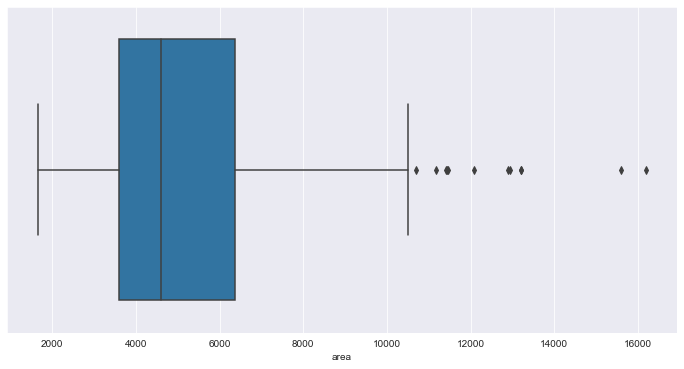

In [69]:
sns.boxplot(house['area'])

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rooms'>

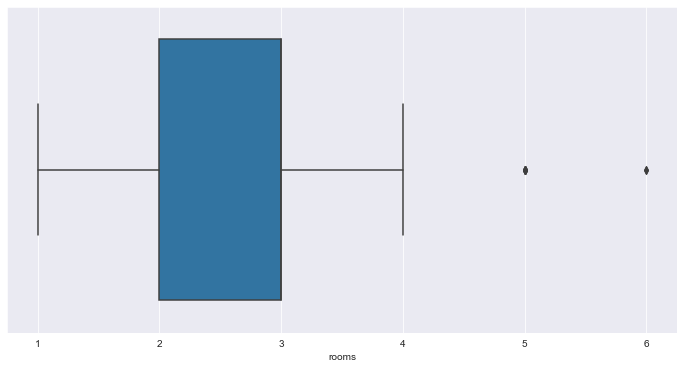

In [70]:
sns.boxplot(house['rooms'])

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathroom'>

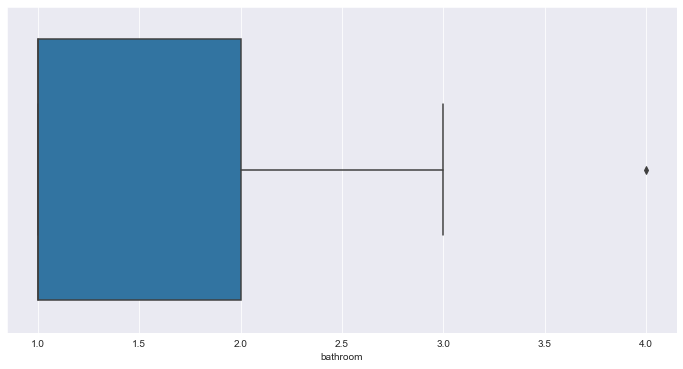

In [71]:
sns.boxplot(house['bathroom'])

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors'>

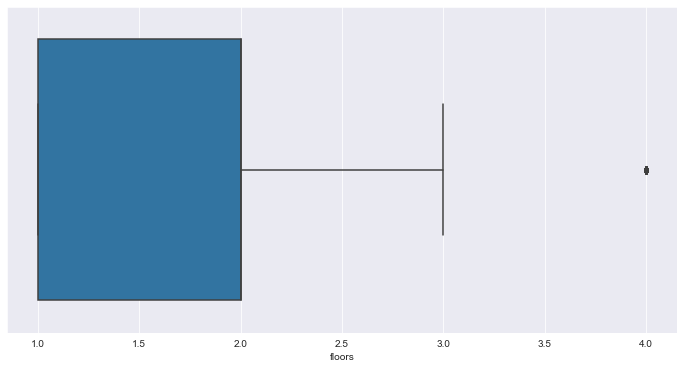

In [72]:
sns.boxplot(house['floors'])

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='driveway'>

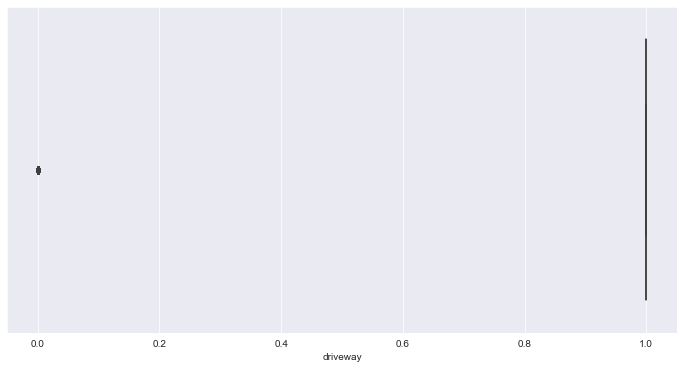

In [73]:
sns.boxplot(house['driveway'])

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='game_room'>

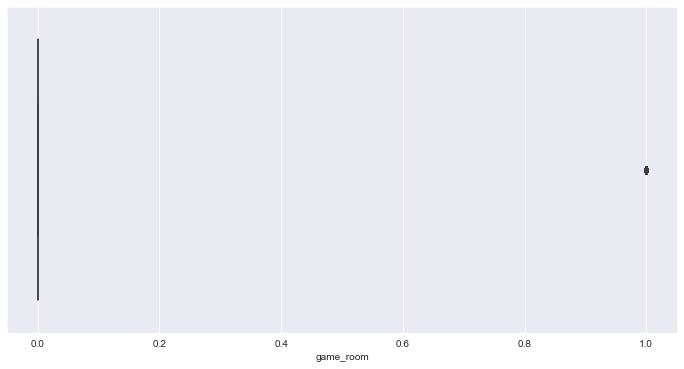

In [74]:
sns.boxplot(house['game_room'])

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cellar'>

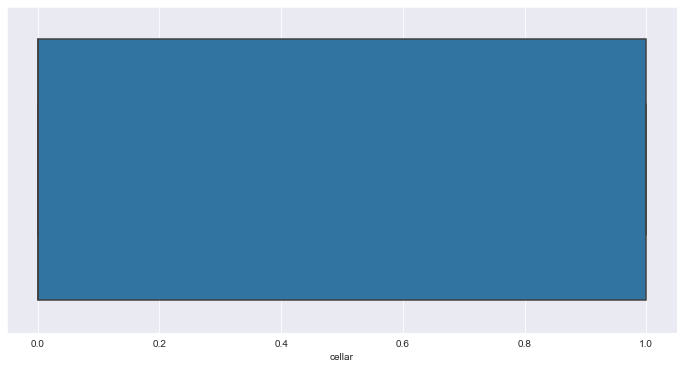

In [75]:
sns.boxplot(house['cellar'])

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gas'>

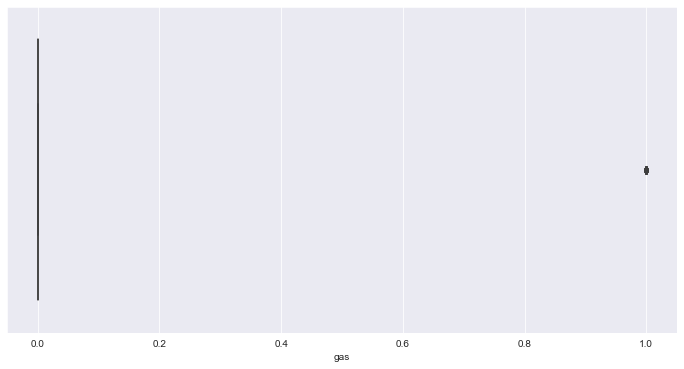

In [76]:
sns.boxplot(house['gas'])

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='air'>

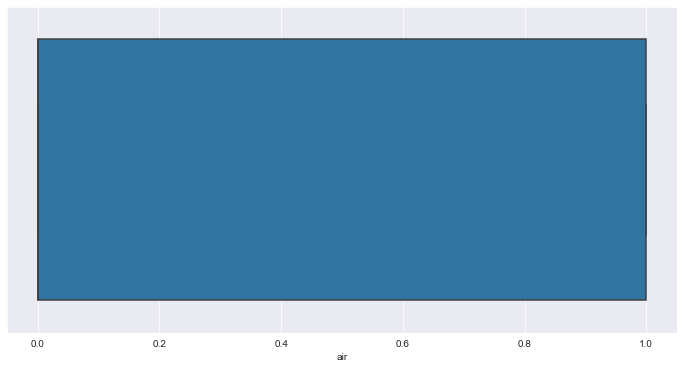

In [77]:
sns.boxplot(house['air'])

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='garage'>

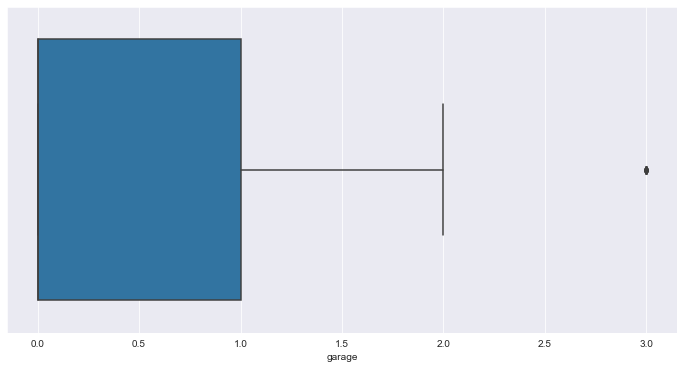

In [78]:
sns.boxplot(house['garage'])

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='situation'>

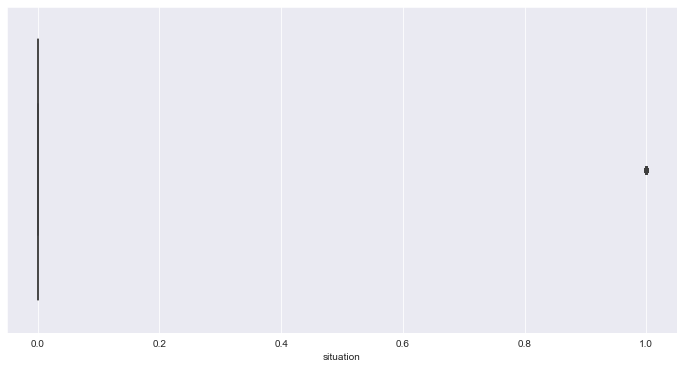

In [79]:
sns.boxplot(house['situation'])

In [80]:
#Dropped these columns because of low/0 variance
house.drop(['driveway','game_room'], axis=1,inplace=True)

In [81]:
house.drop(['gas','situation'],axis=1,inplace=True)

In [82]:
house.head()

,price,area,rooms,bathroom,floors,cellar,air,garage
0,42000,5850,3,1,2,1,0,1
1,38500,4000,2,1,1,0,0,0
2,49500,3060,3,1,1,0,0,0
3,60500,6650,3,1,2,0,0,0
4,61000,6360,2,1,1,0,0,0


In [ ]:
# Outlier treatment

In [83]:
# Limits
# area
upper_limit=house['area'].mean()+3*house['area'].std()
lower_limit=house['area'].mean()-3*house['area'].std()
print('Upper limit', upper_limit)
print('Lower limit', lower_limit)

Upper limit 11654.741743451237
Lower limit -1354.2106079201021


In [84]:
# Finding outliers

house.loc[(house['area']>upper_limit)|(house['area']<lower_limit)]

,price,area,rooms,bathroom,floors,cellar,air,garage
358,97000,12090,4,2,2,0,0,2
364,84900,15600,3,1,1,0,1,2
365,99000,13200,2,1,1,1,0,1
368,145000,16200,5,3,2,0,0,0
382,140000,13200,3,1,2,1,1,2
490,50000,12944,3,1,1,0,0,0
532,70000,12900,3,1,1,0,0,2


In [85]:
# Capping
house.loc[house['area']>upper_limit, 'area']=upper_limit
house.loc[house['area']<lower_limit, 'area']=lower_limit

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

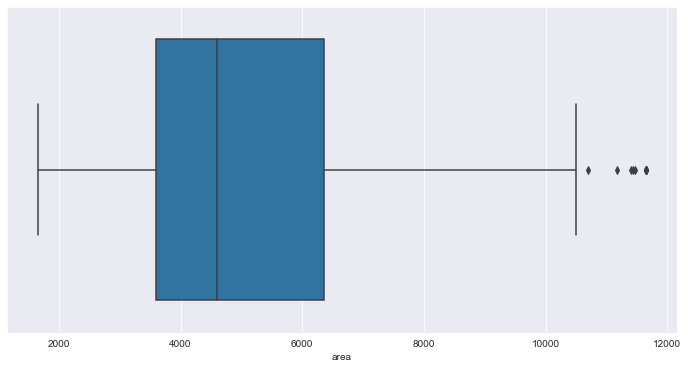

In [86]:
sns.boxplot(house['area'])

In [87]:
# rooms
upper_limit=house['rooms'].mean()+3*house['rooms'].std()
lower_limit=house['rooms'].mean()-3*house['rooms'].std()
print('Upper limit', upper_limit)
print('Lower limit', lower_limit)

Upper limit 5.177365273920092
Lower limit 0.7530376564828387


In [88]:
# Capping
house.loc[house['rooms']>upper_limit, 'rooms']=upper_limit
house.loc[house['rooms']<lower_limit, 'rooms']=lower_limit

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rooms'>

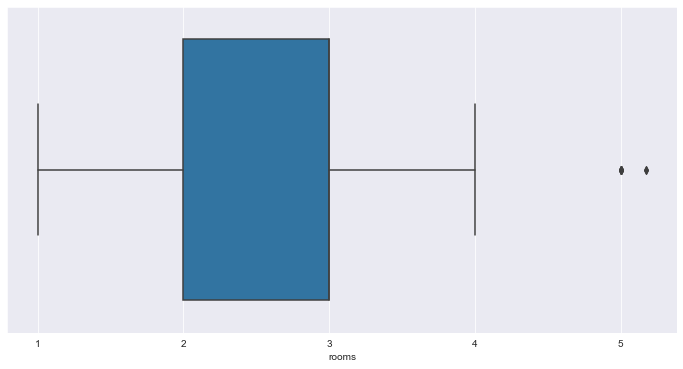

In [89]:
sns.boxplot(house['rooms'])

In [90]:
# bathroom
upper_limit=house['bathroom'].mean()+3*house['bathroom'].std()
lower_limit=house['bathroom'].mean()-3*house['bathroom'].std()
print('Upper limit', upper_limit)
print('Lower limit', lower_limit)

Upper limit 2.792187865782748
Lower limit -0.22075929435417607


In [91]:
# Capping
house.loc[house['bathroom']>upper_limit, 'bathroom']=upper_limit
house.loc[house['bathroom']<lower_limit, 'bathroom']=lower_limit

C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathroom'>

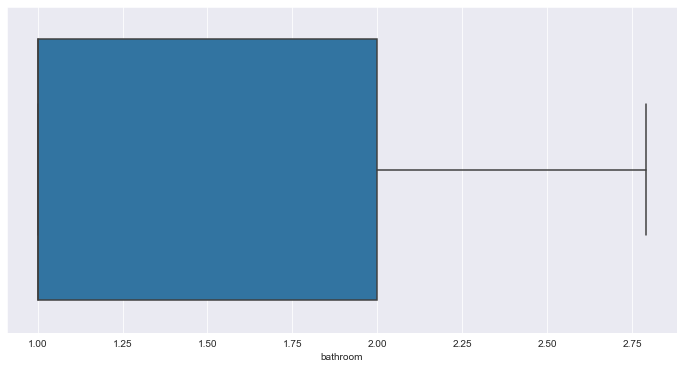

In [92]:
sns.boxplot(house['bathroom'])

Upper limit 4.412299809782315
Lower limit -0.7969151943976993


C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors'>

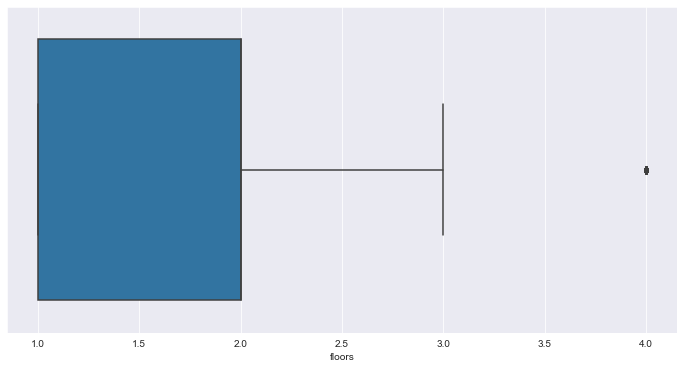

In [93]:
# floors
upper_limit=house['floors'].mean()+3*house['floors'].std()
lower_limit=house['floors'].mean()-3*house['floors'].std()
print('Upper limit', upper_limit)
print('Lower limit', lower_limit)
# Capping
house.loc[house['floors']>upper_limit, 'floors']=upper_limit
house.loc[house['floors']<lower_limit, 'floors']=lower_limit
sns.boxplot(house['floors'])

Upper limit 3.27622734864421
Lower limit -1.8916119640288251


C:\Users\Smrithi\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='garage'>

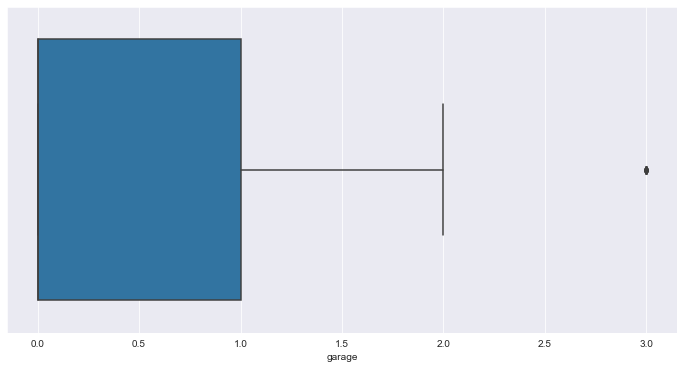

In [94]:
# garage
upper_limit=house['garage'].mean()+3*house['garage'].std()
lower_limit=house['garage'].mean()-3*house['garage'].std()
print('Upper limit', upper_limit)
print('Lower limit', lower_limit)
# Capping
house.loc[house['garage']>upper_limit, 'garage']=upper_limit
house.loc[house['garage']<lower_limit, 'garage']=lower_limit
sns.boxplot(house['garage'])

# Correlation check

In [95]:
corrmat=house.corr()
print (corrmat)

             price      area     rooms  bathroom    floors    cellar  \
price     1.000000  0.543272  0.371856  0.511308  0.421190  0.186218   
area      0.543272  1.000000  0.153666  0.189971  0.093126  0.053536   
rooms     0.371856  0.153666  1.000000  0.379164  0.413132  0.101694   
bathroom  0.511308  0.189971  0.379164  1.000000  0.324628  0.108399   
floors    0.421190  0.093126  0.413132  0.324628  1.000000 -0.173860   
cellar    0.186218  0.053536  0.101694  0.108399 -0.173860  1.000000   
air       0.453347  0.230970  0.165629  0.188676  0.296216  0.045248   
garage    0.383302  0.364196  0.142118  0.170239  0.043412  0.052524   

               air    garage  
price     0.453347  0.383302  
area      0.230970  0.364196  
rooms     0.165629  0.142118  
bathroom  0.188676  0.170239  
floors    0.296216  0.043412  
cellar    0.045248  0.052524  
air       1.000000  0.156596  
garage    0.156596  1.000000  


In [96]:
    print('\n\n\n Triangular matrix \n\n\n')
    upper_tri=corrmat.where(np.triu(np.ones(corrmat.shape),k=1).astype(np.bool))
    print(upper_tri)
    to_drop=[column for column in upper_tri.columns if any (upper_tri[column]>0.75)]
    print()
    print ("Below are to drop columns")
    print (to_drop)




 Triangular matrix 



          price      area     rooms  bathroom    floors    cellar       air  \
price       NaN  0.543272  0.371856  0.511308  0.421190  0.186218  0.453347   
area        NaN       NaN  0.153666  0.189971  0.093126  0.053536  0.230970   
rooms       NaN       NaN       NaN  0.379164  0.413132  0.101694  0.165629   
bathroom    NaN       NaN       NaN       NaN  0.324628  0.108399  0.188676   
floors      NaN       NaN       NaN       NaN       NaN -0.173860  0.296216   
cellar      NaN       NaN       NaN       NaN       NaN       NaN  0.045248   
air         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
garage      NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            garage  
price     0.383302  
area      0.364196  
rooms     0.142118  
bathroom  0.170239  
floors    0.043412  
cellar    0.052524  
air       0.156596  
garage         NaN  

Below are to drop columns
[]


C:\Users\Smrithi\AppData\Local\Temp\ipykernel_85492\783114316.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri=corrmat.where(np.triu(np.ones(corrmat.shape),k=1).astype(np.bool))


In [ ]:
# Correlated variables are 0

# Standardization

In [104]:
house

,price,area,rooms,bathroom,floors,cellar,air,garage
0,42000,5850.0,3.0,1.0,2.0,1,0,1.0
1,38500,4000.0,2.0,1.0,1.0,0,0,0.0
2,49500,3060.0,3.0,1.0,1.0,0,0,0.0
3,60500,6650.0,3.0,1.0,2.0,0,0,0.0
4,61000,6360.0,2.0,1.0,1.0,0,0,0.0
...,...,...,...,...,...,...,...,...
541,91500,4800.0,3.0,2.0,4.0,0,1,0.0
542,94000,6000.0,3.0,2.0,4.0,0,1,0.0
543,103000,6000.0,3.0,2.0,4.0,0,1,1.0
544,105000,6000.0,3.0,2.0,2.0,0,1,1.0


In [105]:
data=house.iloc[:, 0:8].values
from sklearn import preprocessing
house_standardized=preprocessing.scale(data)
house_standardized=pd.DataFrame(house_standardized,columns=house.columns)

In [106]:
house_standardized

,price,area,rooms,bathroom,floors,cellar,air,garage
0,-0.979136,0.351786,0.052090,-0.583119,0.221704,1.363319,-0.681034,0.357567
1,-1.110329,-0.544165,-1.325518,-0.583119,-0.931157,-0.733504,-0.681034,-0.804525
2,-0.698008,-0.999405,0.052090,-0.583119,-0.931157,-0.733504,-0.681034,-0.804525
3,-0.285686,0.739225,0.052090,-0.583119,0.221704,-0.733504,-0.681034,-0.804525
4,-0.266944,0.598778,-1.325518,-0.583119,-0.931157,-0.733504,-0.681034,-0.804525
...,...,...,...,...,...,...,...,...
541,0.876311,-0.156726,0.052090,1.501712,2.527427,-0.733504,1.468356,-0.804525
542,0.970020,0.424431,0.052090,1.501712,2.527427,-0.733504,1.468356,-0.804525
543,1.307374,0.424431,0.052090,1.501712,2.527427,-0.733504,1.468356,0.357567
544,1.382342,0.424431,0.052090,1.501712,0.221704,-0.733504,1.468356,0.357567


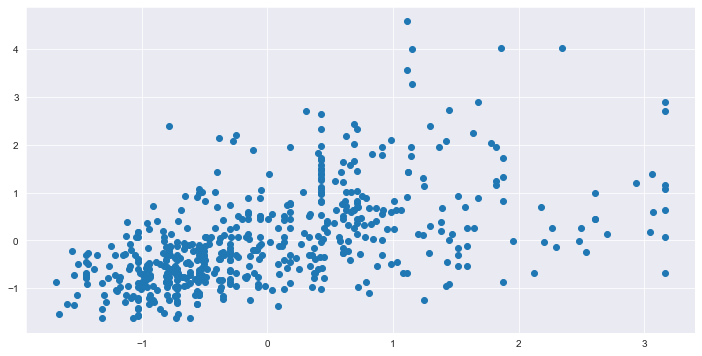

In [107]:
# Let's see ig we have a linear relation between price and area
#sns.palettes(house['area'], house['price'], palette = 'viridis')
plt.scatter(house_standardized['area'], house_standardized['price'])
plt.show()

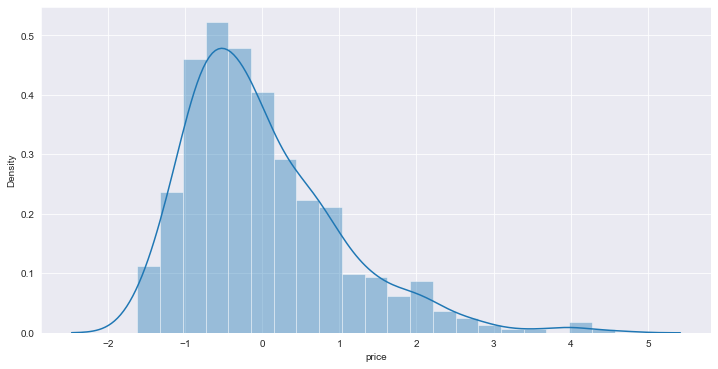

In [108]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house_standardized['price'])
plt.show()

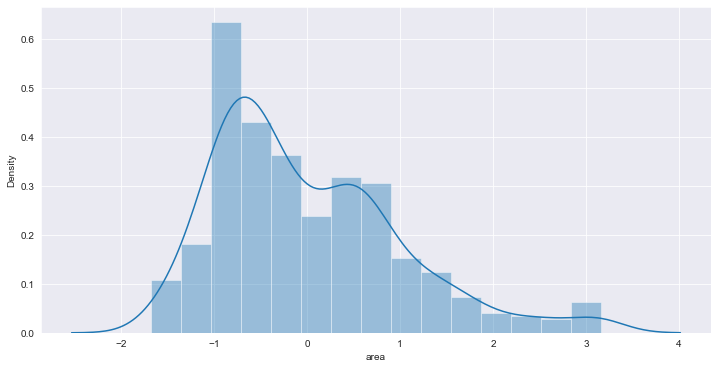

In [109]:
sns.distplot(house_standardized['area'])
plt.show()

In [117]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [118]:
# We now instatiate a Linear Regression object
lm = LinearRegression()

In [119]:
# let's do the split of the dataset
house_standardized.columns
X = house_standardized[['area', 'rooms', 'bathroom', 'floors',
       'cellar', 'air', 'garage']]
y = house_standardized['price']

In [120]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [121]:
## Let's chec the head of some of these splits
X_test.head()
# We see that they are randomly selected

,area,rooms,bathroom,floors,cellar,air,garage
225,-1.125322,0.052090,1.501712,0.221704,1.363319,1.468356,0.357567
18,-0.810529,-2.703125,-0.583119,-0.931157,-0.733504,-0.681034,-0.804525
48,-0.079239,1.429697,-0.583119,1.374565,-0.733504,-0.681034,-0.804525
355,2.491899,0.052090,-0.583119,-0.931157,-0.733504,-0.681034,0.357567
350,2.293821,0.052090,-0.583119,-0.931157,-0.733504,-0.681034,-0.804525


In [15]:
# Now let's build the model using sklearn
#lm.fit(X_test,y_test)

In [16]:
# Now let's look at the coefficients
#print(lm.coef_)
# it would be nicer if we can put them together in a dataframe

In [17]:
#coef = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
#coef

In [122]:
import statsmodels.api as sm

In [123]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_test)

In [124]:
res = sm.OLS(y_test, X_endog)
res.fit()

In [125]:
res.fit().summary()#Doubt-----> R-squared value decreased after EDA, why? How to find accuracy?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     38.29
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           7.38e-31
Time:                        18:15:36   Log-Likelihood:                -135.27
No. Observations:                 164   AIC:                             286.5
Df Residuals:                     156   BIC:                             311.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0688      0.045     -1.519      0.131      -0.158       0.021
area           0.3123      0.047      6.580      0.000       0.219       0.406
rooms         -0.0066      0.051     -0.130      0.897      -0.107       0.094
bathroom       0.2522      0.050      5.033      0.000       0.153       0.351
floors         0.2390      0.062      3.880      0.000       0.117       0.361
cellar         0.2292      0.047      4.857      0.000       0.136       0.322
air            0.1974      0.049      4.052      0.000       0.101       0.294
garage         0.1016      0.046      2.189      0.030       0.010       0.193
==============================================================================
Omnibus:                        7.679   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                9.135
Skew:                           0.334   Prob(JB):                       0.0104
Kurtosis:                       3.944   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#predictions = lm.predict(X_test)

In [23]:
# To check the quality of our model, let's plot it
#sns.scatterplot(y_test, predictions)

In [24]:
# Evaluation metrics
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)
#import numpy as np
#from sklearn import metrics

#print('MAE :', metrics.mean_absolute_error(y_test, predictions))
#print('MSE :', metrics.mean_squared_error(y_test, predictions))
#print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 10248.782807401953
MSE : 188311345.17713058
RMSE : 13722.658094448414

In [126]:
X_endog_test = sm.add_constant(X_test)
model = res.fit()
predictions = model.predict(X_endog_test)

In [127]:
predictions

225    0.649867
18    -1.058068
48    -0.305699
355    0.073248
350   -0.106698
         ...   
401    0.722826
189   -0.383858
43     1.135635
36    -0.498474
405    0.452017
Length: 164, dtype: float64